# Bh14 fluxo:
## simulação cronos_ssw3_loki_5b
[🔗 Abrir no Google Colab](https://colab.research.google.com/github/Carlos-G-Santos/bh14/blob/main/flux.ipynb)

In [16]:
import pandas as pd # importando bib
import numpy as np

### Lendo arquivo 516 

In [17]:
df = pd.read_csv('flux_516', sep='\s+')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4813/440990232.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('flux_516', sep='\s+')


,energy,flux,relative
0,1.0000E-11,2.615700e-12,1.0000
1,3.0900E-10,7.506350e-09,0.0793
2,3.9700E-10,6.285860e-09,0.0902
3,5.1000E-10,1.297210e-08,0.1198
4,6.5400E-10,2.295720e-08,0.0698


### Abrindo arquivo cronos_ssw3_loki_5b_cont.o e selecionando os tallies F2 com os fluxos
#### Fluxo 516


In [ ]:
# Visualiza as linhas 728 a 828 como tabela usando pandas
with open('cronos_ssw3_loki_5b_cont.o', 'r') as f:
    lines = f.readlines()
dados = [line.strip().split() for line in lines[591:695]] # coloca sempre a primeira linha superfice <n> e a penultima linha. 
df1 = pd.DataFrame(dados) 
df1

,0,1,2
0,energy,None,None
1,1.0000E-11,2.61570E-12,1.0000
2,3.0900E-10,7.50635E-09,0.0793
3,3.9700E-10,6.28586E-09,0.0902
4,5.1000E-10,1.29721E-08,0.1198
...,...,...,...
99,1.0500E+01,2.16219E-07,0.0186
100,1.3500E+01,2.74223E-08,0.0481
101,1.7300E+01,1.17291E-09,0.1517
102,2.0000E+01,6.21468E-12,1.0000


In [19]:
# define colunas e remove a primeira e a última linha
df1.columns = ['energy', 'flux', 'error']
df1 = df1.iloc[1:-1]
# convertendo os dados da colunas para float
df1 = df1.astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 1 to 102
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   energy  102 non-null    float64
 1   flux    102 non-null    float64
 2   error   102 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


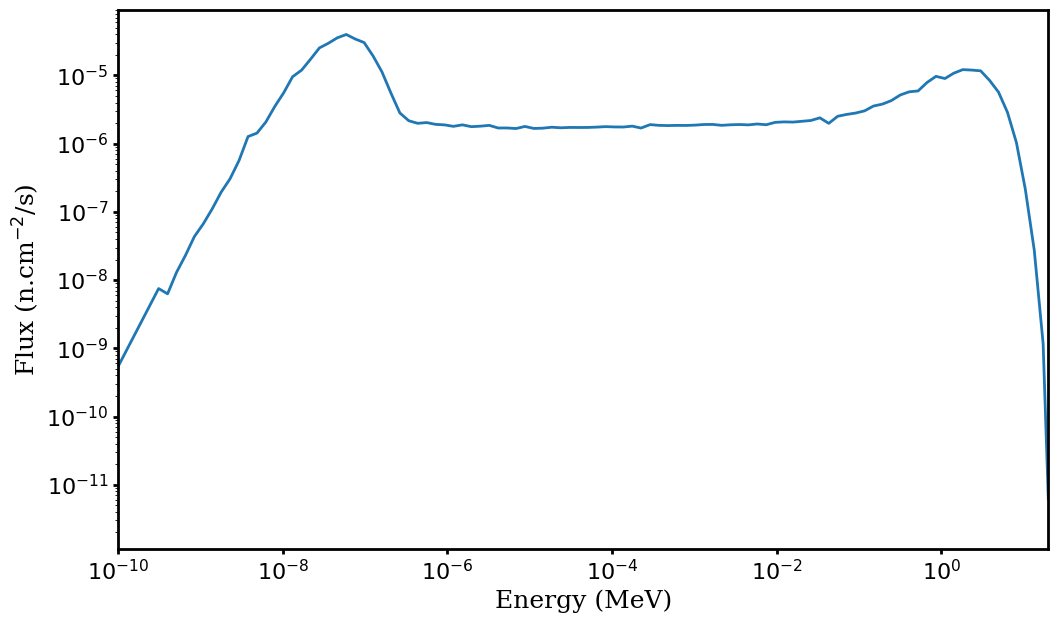

In [ ]:
# plot do fluxo superficie 516 
import matplotlib.pyplot as plt

fig, ax= plt.subplots(figsize=(12, 7))
ax.plot(df1["energy"], df1['flux'], linewidth=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy (MeV)', fontsize=18, fontfamily='serif')
ax.set_ylabel('Flux (n.cm$^{-2}$/s)', fontsize=18, fontfamily='serif')
ax.set_xlim(1e-10, 20)
ax.tick_params(axis='both', which='major', labelsize=16, width=2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

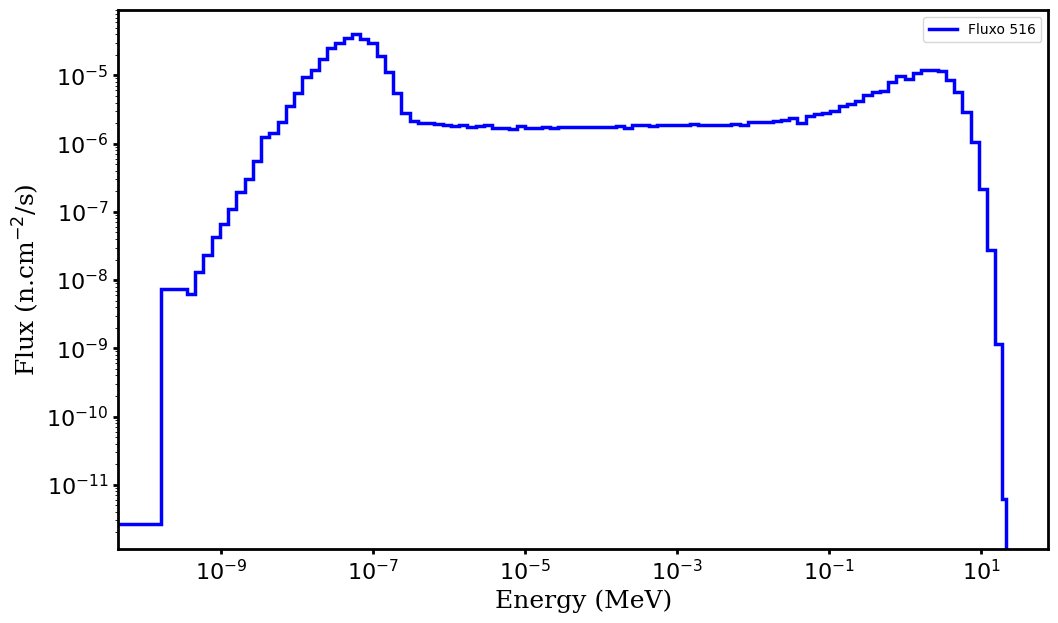

In [21]:
import numpy as np

energy = df1['energy'].to_numpy()
flux = df1['flux'].to_numpy()

# Calcula edges assumindo que energy são centros dos bins
edges = np.zeros(len(energy) + 1)
edges[1:-1] = (energy[:-1] + energy[1:]) / 2
edges[0] = energy[0] - (energy[1] - energy[0]) / 2
edges[-1] = energy[-1] + (energy[-1] - energy[-2]) / 2

fig, ax = plt.subplots(figsize=(12, 7))
ax.stairs(flux, edges, linewidth=2.5, color='blue', label = 'Fluxo 516')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy (MeV)', fontsize=18, fontfamily='serif')
ax.set_ylabel('Flux (n.cm$^{-2}$/s)', fontsize=18, fontfamily='serif')
ax.tick_params(axis='both', which='major', labelsize=16, width=2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.legend()
plt.show()

#### Fluxo 517

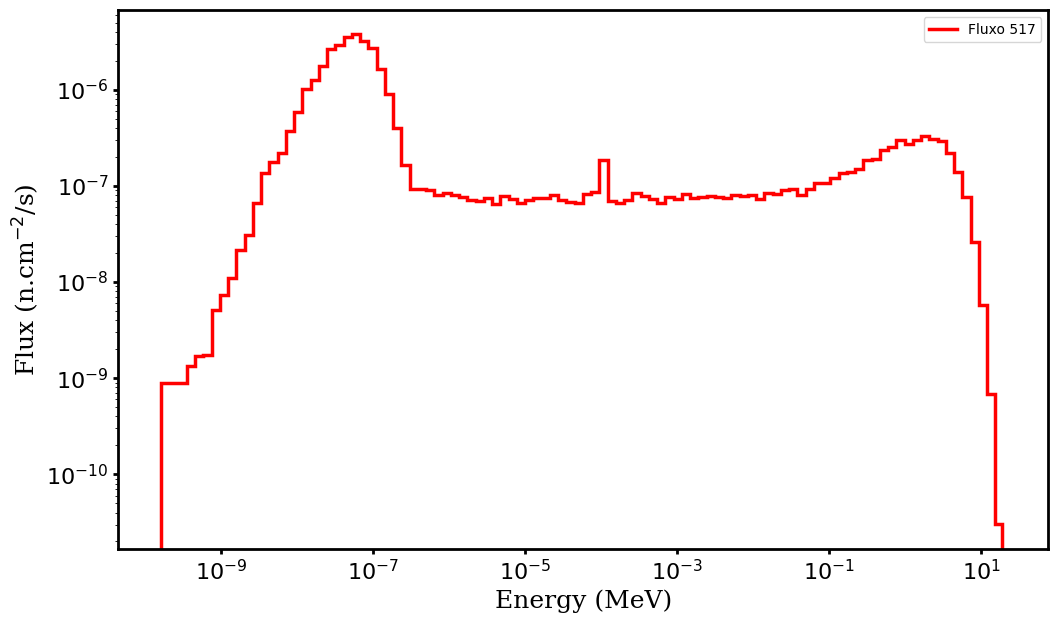

In [22]:
# Visualiza as linhas 728 a 828 como tabela usando pandas
with open('cronos_ssw3_loki_5b_cont.o', 'r') as f:
    lines = f.readlines()
dados = [line.strip().split() for line in lines[724:828]] 
df2 = pd.DataFrame(dados) 
# def colunas e tirando a primeira e ultima linha
df2.columns = ['energy','flux', 'error']
df2 = df2.iloc[1:-1]
# convertendo os dados em float
df2 = df2.astype(float)
# plotando o espectro
energy2 = df2['energy'].to_numpy() # convertendo para numpy array
flux2 = df2['flux'].to_numpy() # convertendo para numpy array

# calculo dos edges considerando que o ponto de energia é o centro do bin
edges2 = np.zeros(len(energy2)+1) # alocando espaço na memória para os edges
edges2[1:-1] = (energy2[:-1] + energy2[1:])/2 # calcula os edges intermediários [:-1] pega todos os elementos menos o ultimo [1:]faz o contrário
edges2[0] = energy2[0] - (energy2[1] - energy2[0])/2 # calcula o primeiro edge
edges2[-1] = energy2[-1] + (energy2[-1] - energy2[-2])/2 # calcula o ultimo edge
# plot do fluxo superficie 517
fig, ax = plt.subplots(figsize=(12, 7))
ax.stairs(flux2, edges2, linewidth=2.5, color='red', label = 'Fluxo 517')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy (MeV)', fontsize=18, fontfamily='serif')
ax.set_ylabel('Flux (n.cm$^{-2}$/s)', fontsize=18, fontfamily='serif')
ax.tick_params(axis='both', which='major', labelsize=16, width=2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.legend()
plt.show()

#### Fluxo 518 (pós filto de bismuto)

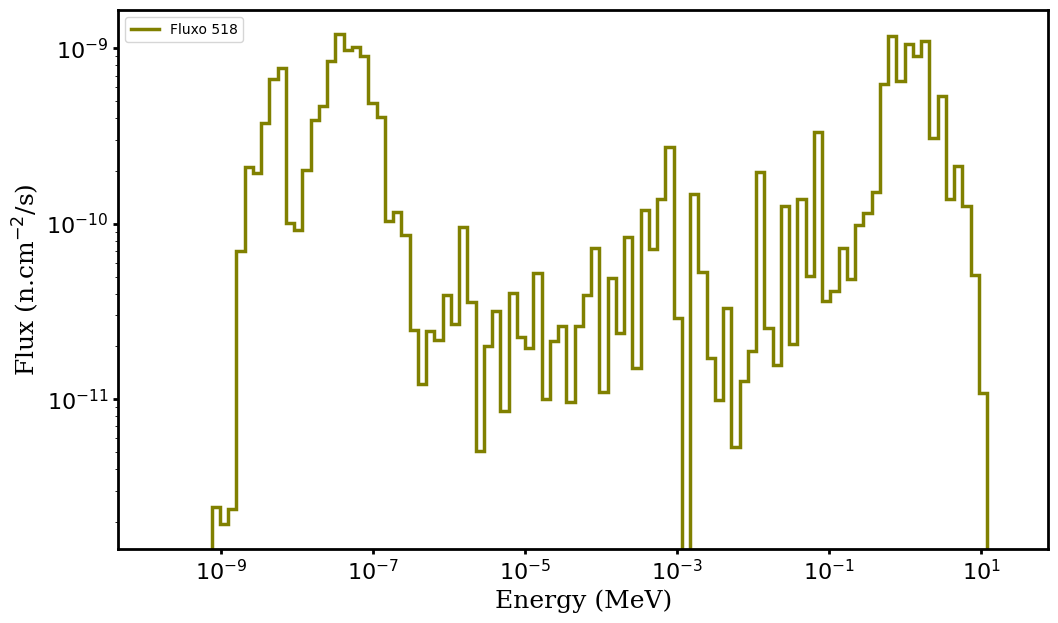

In [23]:
# Visualiza as linhas 728 a 828 como tabela usando pandas
with open('cronos_ssw3_loki_5b_cont.o', 'r') as f:
    lines = f.readlines()
dados = [line.strip().split() for line in lines[857:961]] # coloca sempre a primeira linha superfice <n> e a penultima linha. 
df3 = pd.DataFrame(dados) 
# def colunas e tirando a primeira e ultima linha
df3.columns = ['energy','flux', 'error']
df3 = df3.iloc[1:-1]
# convertendo os dados em float
df3 = df3.astype(float)
# plotando o espectro
energy3 = df3['energy'].to_numpy() # convertendo para numpy array
flux3 = df3['flux'].to_numpy() # convertendo para numpy array

# calculo dos edges considerando que o ponto de energia é o centro do bin
edges3 = np.zeros(len(energy3)+1) # alocando espaço na memória para os edges
edges3[1:-1] = (energy3[:-1] + energy3[1:])/2 # calcula os edges intermediários [:-1] pega todos os elementos menos o ultimo [1:]faz o contrário
edges3[0] = energy3[0] - (energy3[1] - energy3[0])/2 # calcula o primeiro edge
edges3[-1] = energy3[-1] + (energy3[-1] - energy3[-2])/2 # calcula o ultimo edge
# plot do fluxo superficie 517
fig, ax = plt.subplots(figsize=(12, 7))
ax.stairs(flux3, edges3, linewidth=2.5, color='olive', label = 'Fluxo 518')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy (MeV)', fontsize=18, fontfamily='serif')
ax.set_ylabel('Flux (n.cm$^{-2}$/s)', fontsize=18, fontfamily='serif')
ax.tick_params(axis='both', which='major', labelsize=16, width=2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.legend()
plt.show()